In [54]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img = cv.imread('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/input/people2.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [55]:
def show(image, dpi):
    plt.figure(dpi=dpi)
    plt.imshow(image)
    plt.show()

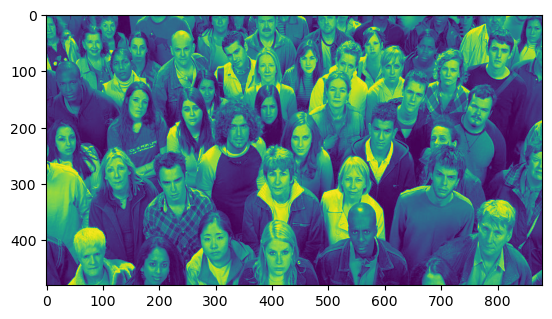

In [56]:
show(img, 100)

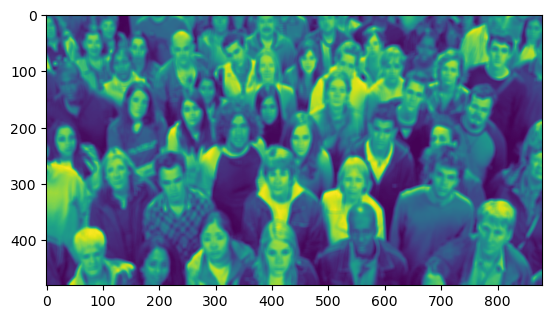

True

In [4]:
blur = cv.blur(img, (7, 7))
show(blur, 100)

blur = cv.blur(img, (7, 7))
cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/blur.jpeg', blur)

#lepsie vysledky
gausBlur = cv.GaussianBlur(img, (5, 5), 0)
cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/gaus_blur.jpeg', gausBlur)

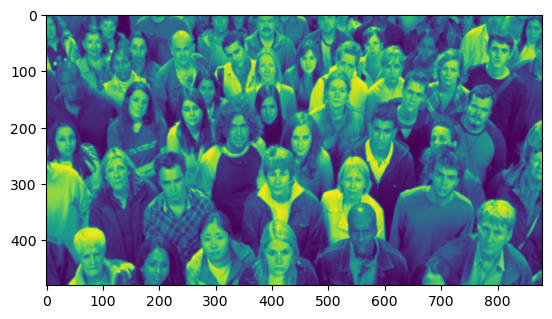

True

In [7]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
closing = cv.morphologyEx(gausBlur, cv.MORPH_CLOSE, kernel)
show(closing, 100)
cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/closing.jpeg', closing)

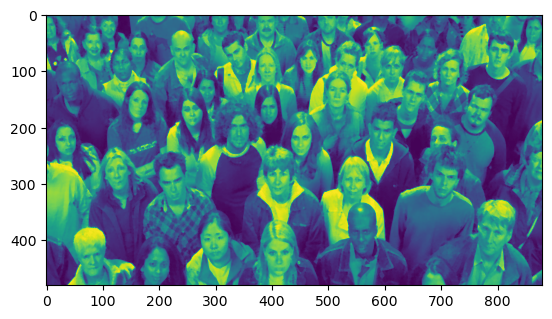

True

In [8]:
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
cl = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
op = cv.morphologyEx(cl,cv.MORPH_OPEN,kernel2)
show(op,100)

cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/opening.jpeg', op)

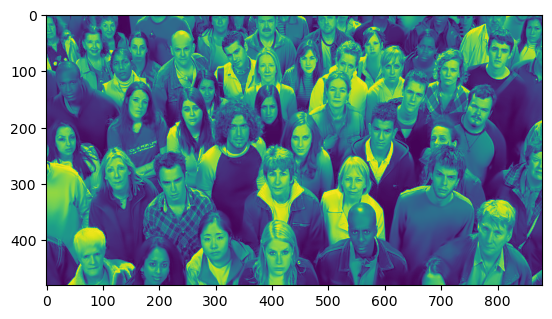

True

In [9]:
noiseless_image_bw = cv.fastNlMeansDenoising(img, None, 10, 15, 10) 
show(noiseless_image_bw,100)
cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/noiseless.jpeg', noiseless_image_bw)

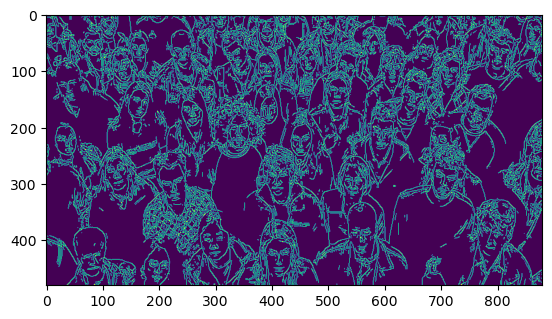

True

In [13]:
canny = cv.Canny(noiseless_image_bw, 120,132)
show(canny,100)
cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/canny.jpeg', canny)

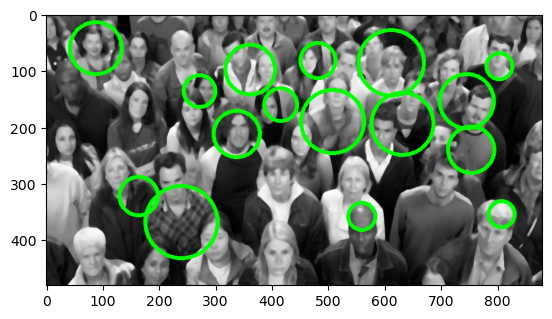

In [35]:
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

#circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,200,
#                            param1=80,param2=50,minRadius=300,maxRadius=370)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,80,
                            param1=100,param2=40,minRadius=20,maxRadius=90)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),5)

show(cimg,100)

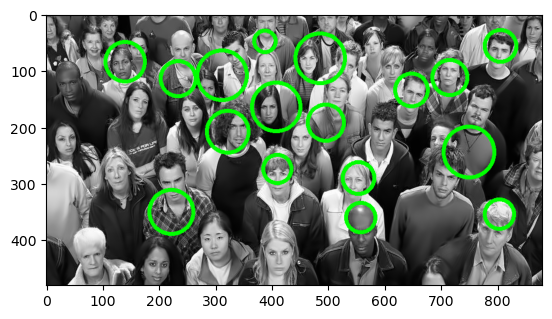

In [47]:
img = cv.medianBlur(noiseless_image_bw,5)
cimg = cv.cvtColor(noiseless_image_bw,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,60,
                            param1=110,param2=43,minRadius=10,maxRadius=80)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),5)

show(cimg,100)

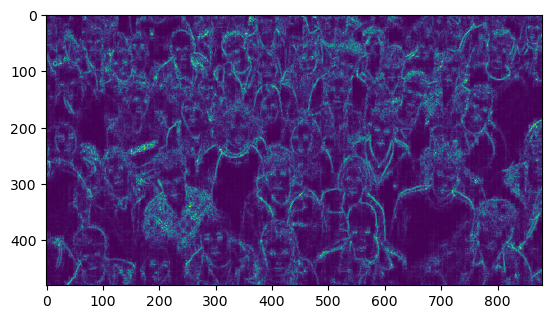

True

In [57]:
laplacian = cv.Laplacian(img, cv.CV_64F)

laplacian = cv.convertScaleAbs(laplacian)
show(laplacian, 100)
cv.imwrite('/Users/monikarapava/Documents/UPJŠ Dokumenty/magisterské/ANO/skuska/people2/zaostrenie.jpeg', laplacian)